In [1]:
import numpy as np
import pulser

from pprint import pprint
from pulser import Pulse, Sequence, Register

In [5]:
L = 4
square = np.array([[i, j] for i in range(L) for j in range(L)], dtype=float)
square -= np.mean(square, axis=0)
square *= 5

qubits = dict(enumerate(square))
reg = Register(qubits)

The original array:


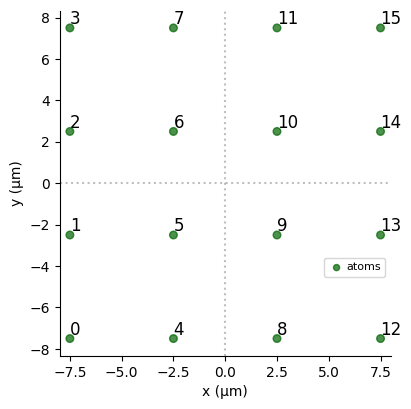

The rotated array


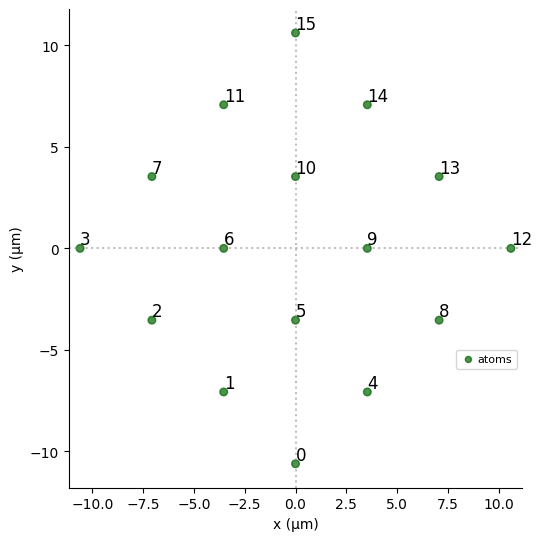

In [6]:
reg1 = Register(qubits)
print('The original array:')
reg1.draw()
reg1.rotate(45)
print('The rotated array')
reg1.draw()

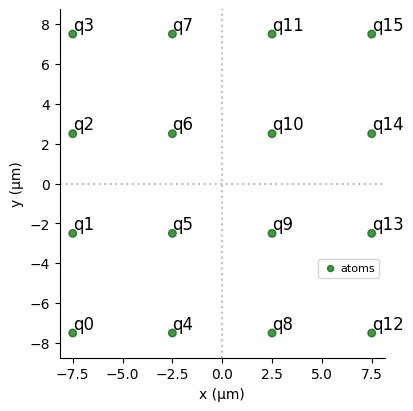

In [7]:
reg2 = Register.from_coordinates(square, prefix='q')
reg2.draw()

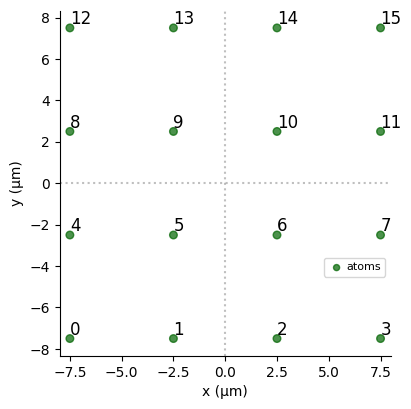

In [8]:
reg3 = Register.square(4, spacing=5)
reg3.draw()

In [23]:
from pulser.devices import DigitalAnalogDevice

seq = Sequence(reg, DigitalAnalogDevice)

In [24]:
seq.available_channels

{'rydberg_global': Rydberg.Global(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 15.707963267948966 rad/µs, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg'),
 'rydberg_local': Rydberg.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Max targets: 1, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg'),
 'raman_local': Raman.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Max targets: 1, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'digital'),
 'dmm_0': DMM.Global(Max Absolute Detuning: None, Max Amplitude: 0, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 671088

In [25]:
seq.declare_channel('ch0', 'raman_local')
print('Available channels after declaring ch0:')
pprint(seq.available_channels)

seq.declare_channel('ch1', 'rydberg_local', initial_target=4)
print('\nAvailable channels after declaring ch1:')
pprint(seq.available_channels)

Available channels after declaring ch0:
{'dmm_0': DMM.Global(Max Absolute Detuning: None, Max Amplitude: 0, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg'),
 'rydberg_global': Rydberg.Global(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 15.707963267948966 rad/µs, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg'),
 'rydberg_local': Rydberg.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Max targets: 1, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg')}

Available channels after declaring ch1:
{'dmm_0': DMM.Global(Max Absolute Detuning: None, Max Amplitude: 0, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg'),
 'ry

In [26]:
seq.declared_channels

{'ch0': Raman.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Max targets: 1, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'digital'),
 'ch1': Rydberg.Local(Max Absolute Detuning: 125.66370614359172 rad/µs, Max Amplitude: 62.83185307179586 rad/µs, Minimum retarget time: 220 ns, Fixed retarget time: 0 ns, Max targets: 1, Clock period: 4 ns, Minimum pulse duration: 16 ns, Maximum pulse duration: 67108864 ns, Basis: 'ground-rydberg')}

In [27]:
seq.target(1, 'ch0')
simple_pulse = Pulse.ConstantPulse(200, 2, -10, 0)
seq.add(simple_pulse, 'ch0')
seq.delay(100, 'ch1')

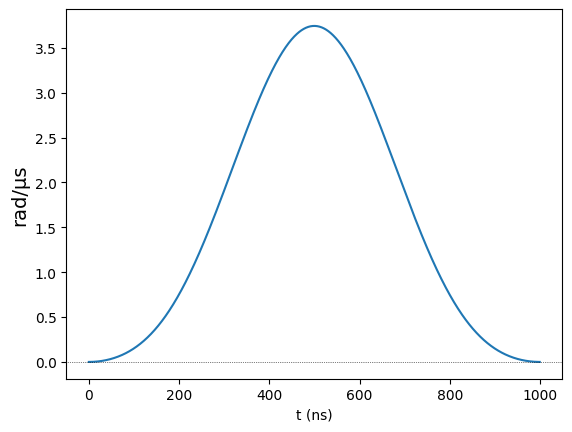

In [28]:
from pulser.waveforms import RampWaveform, BlackmanWaveform

duration = 1000
amp_wf = BlackmanWaveform(duration, np.pi / 2)
detuning_wf = RampWaveform(duration, -20, 20)

amp_wf.draw()

In [30]:
amp_wf.integral

1.5707963267948968

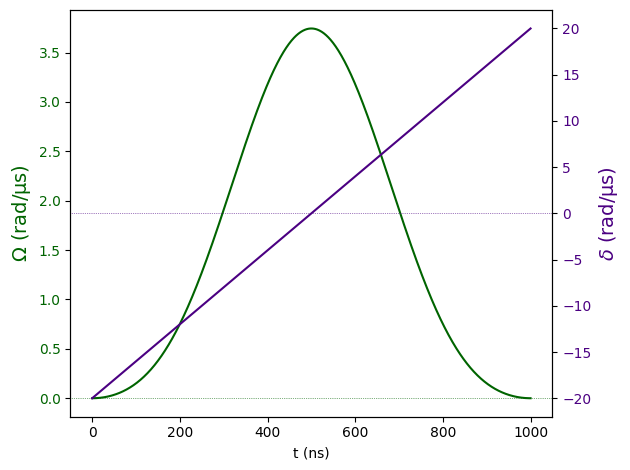

In [31]:
complex_pulse = Pulse(amp_wf, detuning_wf, phase=0)
complex_pulse.draw()

In [32]:
seq.add(complex_pulse, 'ch1')
print(seq)

Channel: ch0
t: 0 | Initial targets: 1 | Phase Reference: 0.0 
t: 0->200 | Pulse(Amp=2 rad/µs, Detuning=-10 rad/µs, Phase=0) | Targets: 1

Channel: ch1
t: 0 | Initial targets: 4 | Phase Reference: 0.0 
t: 0->100 | Delay 
t: 100->1100 | Pulse(Amp=Blackman(Area: 1.57), Detuning=Ramp(-20->20 rad/µs), Phase=0) | Targets: 4




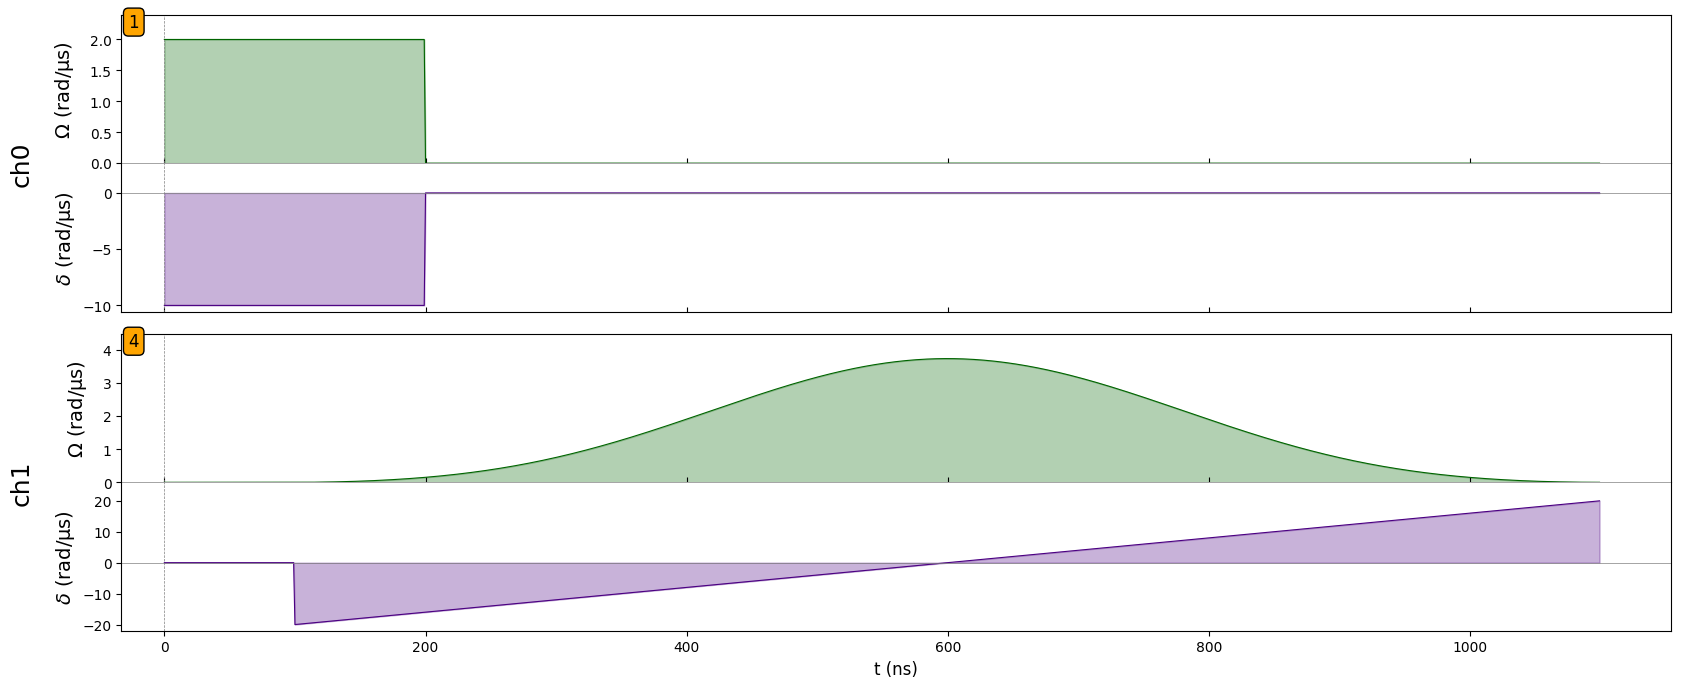

In [33]:
seq.draw()

Current schedule:
Channel: ch0
t: 0 | Initial targets: 1 | Phase Reference: 0.0 
t: 0->200 | Pulse(Amp=2 rad/µs, Detuning=-10 rad/µs, Phase=0) | Targets: 1
t: 200->220 | Target: 4 | Phase Reference: 0.0
t: 220->1100 | Delay 
t: 1100->2100 | Pulse(Amp=Blackman(Area: 1.57), Detuning=Ramp(-20->20 rad/µs), Phase=0) | Targets: 4

Channel: ch1
t: 0 | Initial targets: 4 | Phase Reference: 0.0 
t: 0->100 | Delay 
t: 100->1100 | Pulse(Amp=Blackman(Area: 1.57), Detuning=Ramp(-20->20 rad/µs), Phase=0) | Targets: 4




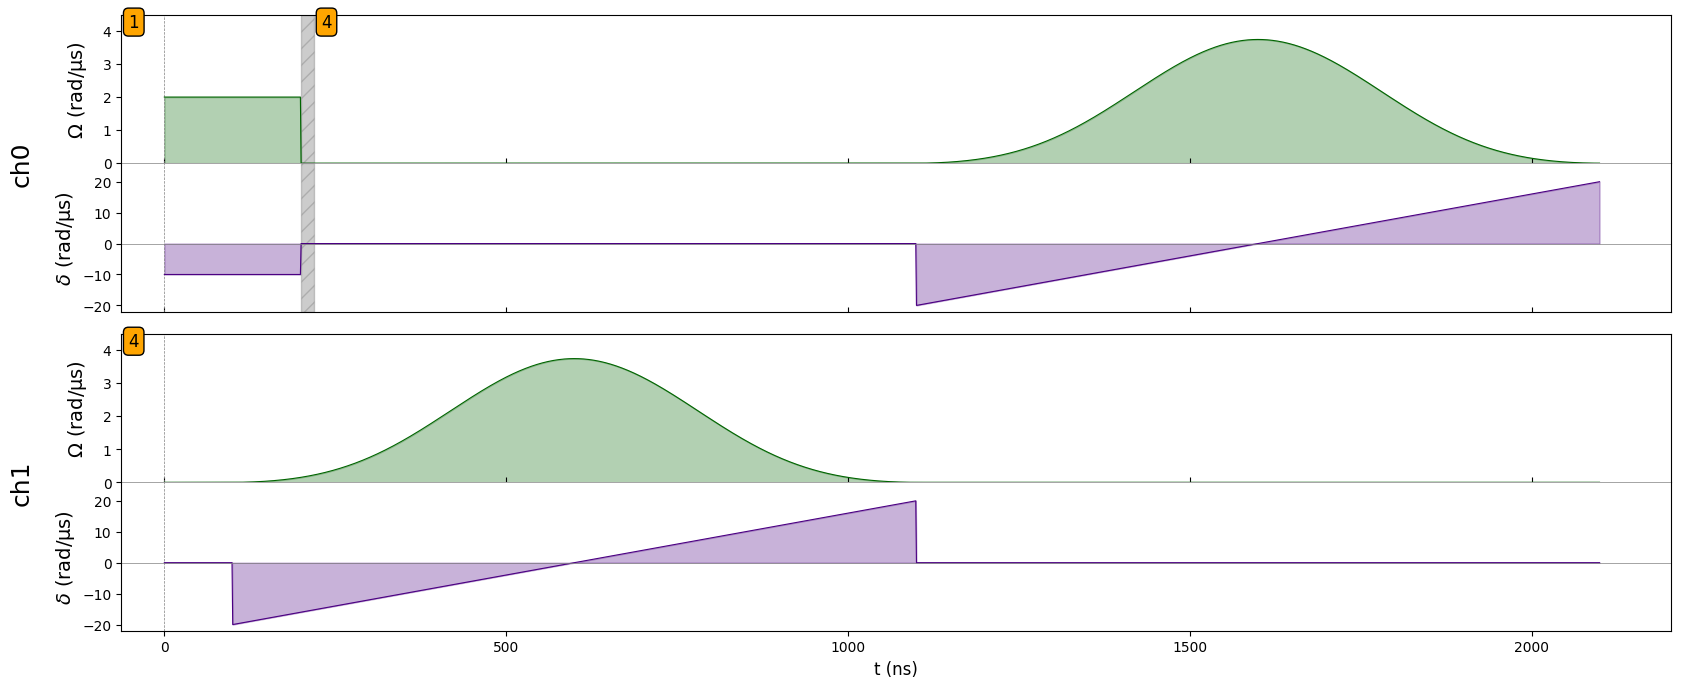

In [34]:
seq.target(4, 'ch0')
seq.add(complex_pulse, 'ch0')

print('Current schedule:')
print(seq)
seq.draw()

Current Schedule:
Channel: ch0
t: 0 | Initial targets: 1 | Phase Reference: 0.0 
t: 0->200 | Pulse(Amp=2 rad/µs, Detuning=-10 rad/µs, Phase=0) | Targets: 1
t: 200->220 | Target: 4 | Phase Reference: 0.0
t: 220->1100 | Delay 
t: 1100->2100 | Pulse(Amp=Blackman(Area: 1.57), Detuning=Ramp(-20->20 rad/µs), Phase=0) | Targets: 4

Channel: ch1
t: 0 | Initial targets: 4 | Phase Reference: 0.0 
t: 0->100 | Delay 
t: 100->1100 | Pulse(Amp=Blackman(Area: 1.57), Detuning=Ramp(-20->20 rad/µs), Phase=0) | Targets: 4
t: 1100->1100 | Target: 0 | Phase Reference: 0.0
t: 1100->1300 | Pulse(Amp=2 rad/µs, Detuning=-10 rad/µs, Phase=0) | Targets: 0
t: 1300->2100 | Delay 
t: 2100->2300 | Pulse(Amp=2 rad/µs, Detuning=-10 rad/µs, Phase=0) | Targets: 0




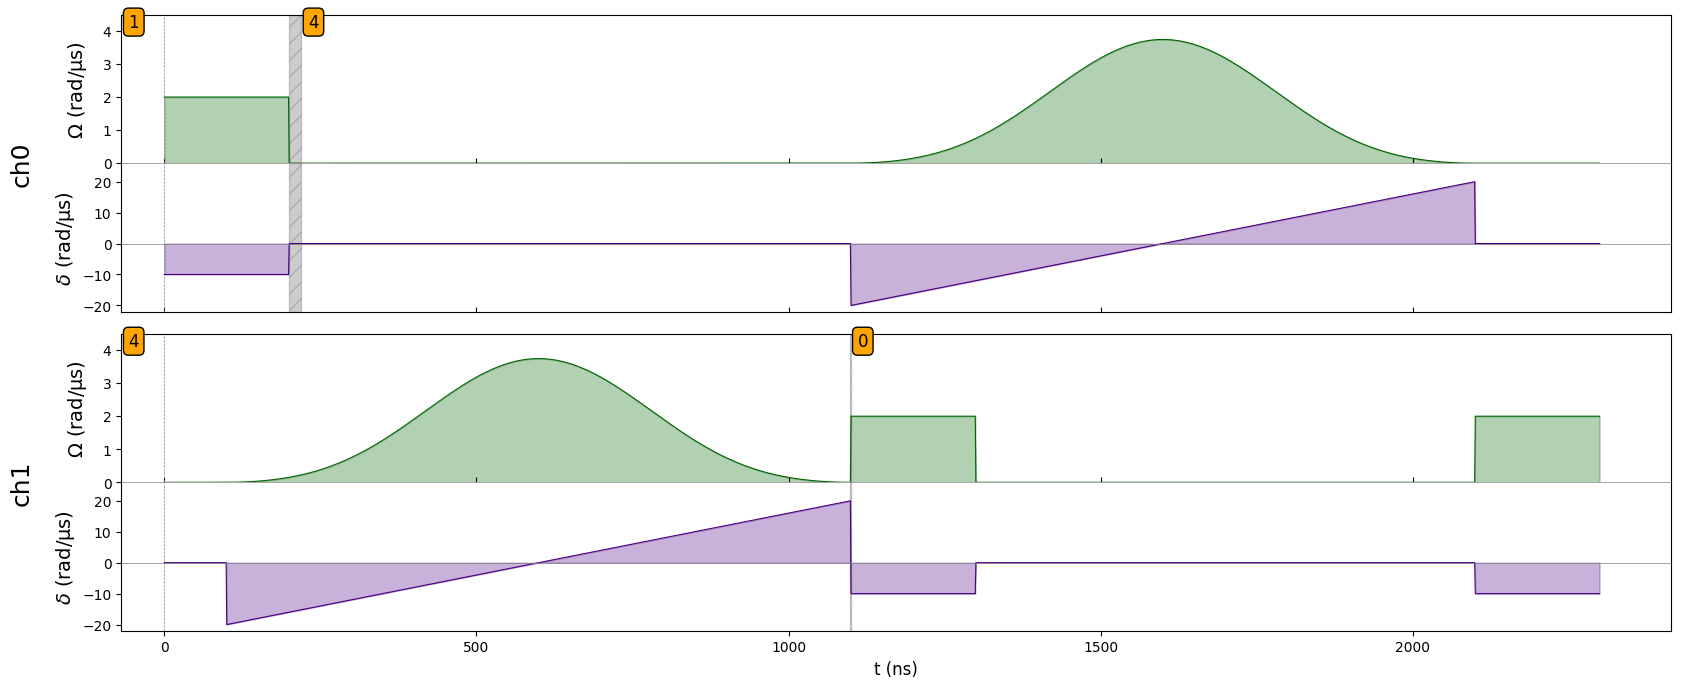

In [35]:
seq.target(0, 'ch1')
seq.add(simple_pulse, 'ch1', protocol='min-delay')
seq.add(simple_pulse, 'ch1', protocol='wait-for-all')

print('Current Schedule:')
print(seq)
seq.draw()

Current Schedule:
Channel: ch0
t: 0 | Initial targets: 1 | Phase Reference: 0.0 
t: 0->200 | Pulse(Amp=2 rad/µs, Detuning=-10 rad/µs, Phase=0) | Targets: 1
t: 200->220 | Target: 4 | Phase Reference: 0.0
t: 220->1100 | Delay 
t: 1100->2100 | Pulse(Amp=Blackman(Area: 1.57), Detuning=Ramp(-20->20 rad/µs), Phase=0) | Targets: 4
t: 2100->2100 | Target: 0 | Phase Reference: 0.0
t: 2100->3100 | Pulse(Amp=Blackman(Area: 1.57), Detuning=Ramp(-20->20 rad/µs), Phase=0) | Targets: 0

Channel: ch1
t: 0 | Initial targets: 4 | Phase Reference: 0.0 
t: 0->100 | Delay 
t: 100->1100 | Pulse(Amp=Blackman(Area: 1.57), Detuning=Ramp(-20->20 rad/µs), Phase=0) | Targets: 4
t: 1100->1100 | Target: 0 | Phase Reference: 0.0
t: 1100->1300 | Pulse(Amp=2 rad/µs, Detuning=-10 rad/µs, Phase=0) | Targets: 0
t: 1300->2100 | Delay 
t: 2100->2300 | Pulse(Amp=2 rad/µs, Detuning=-10 rad/µs, Phase=0) | Targets: 0




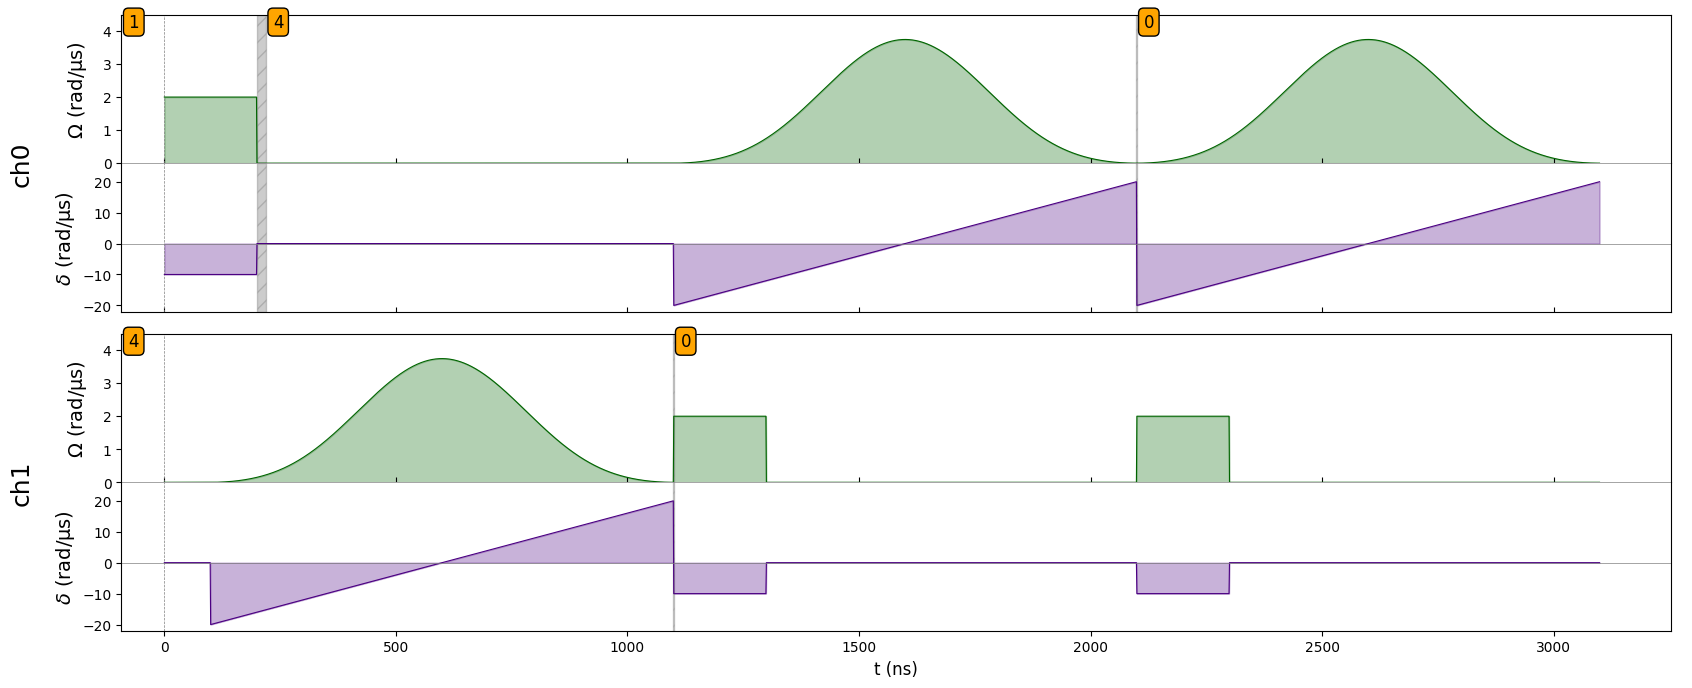

In [36]:
seq.target(0, 'ch0')
seq.add(complex_pulse, 'ch0', protocol='no-delay')

print('Current Schedule:')
print(seq)
seq.draw()

In [38]:
seq.measure(basis='ground-rydberg')

In [39]:
DigitalAnalogDevice.supported_bases

{'digital', 'ground-rydberg'}

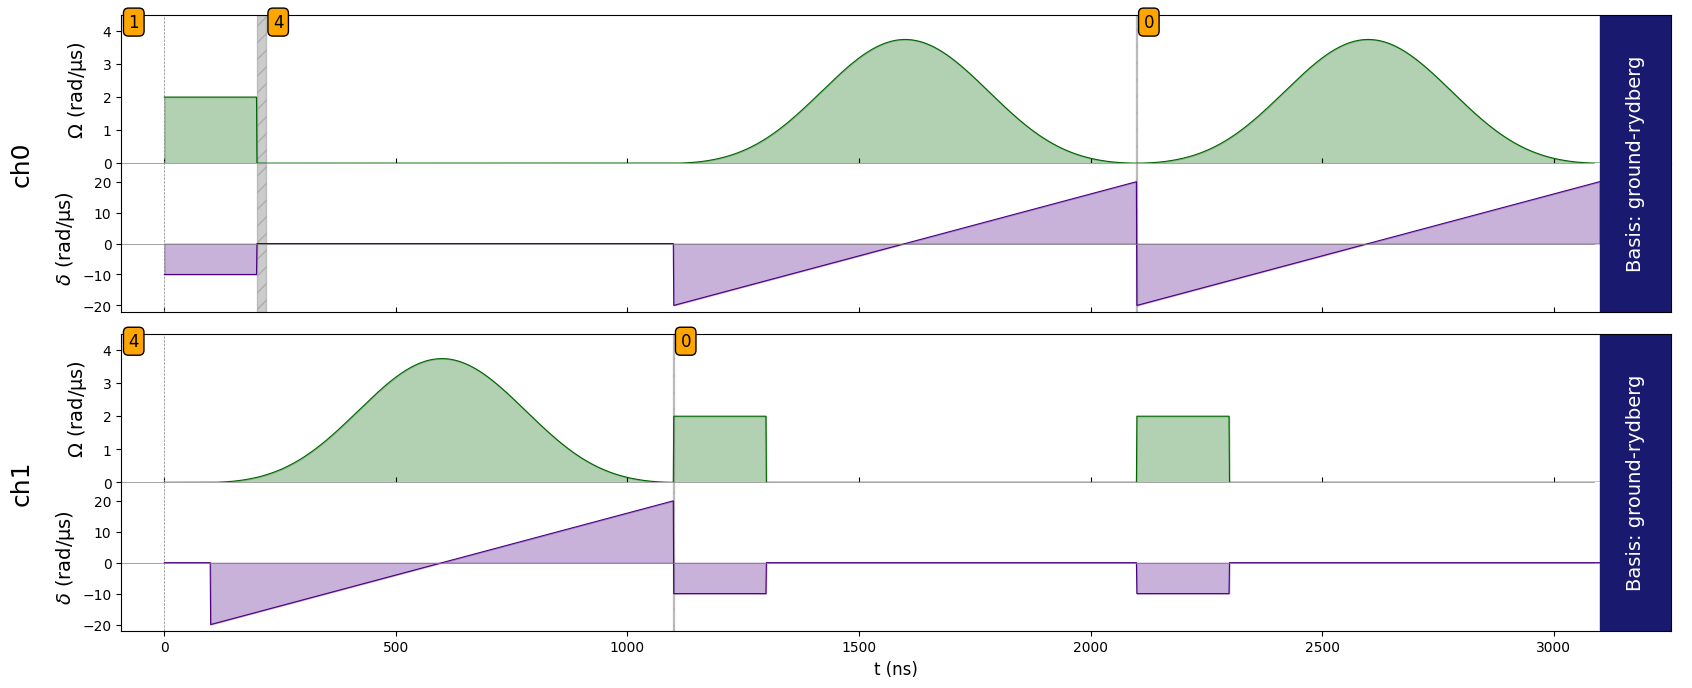

In [40]:
seq.draw()